# Post processing the AWAKEN ABL case

In [1]:
%%capture 

# Important libraries header information
# ----------------------------------

# change this directory as necessary
#amrwindfedir = '/home/lcheung/hpc_home/local/Git/amrwind-frontend'   # my version
amrwindfedir = '/projects/wind_uq/lcheung/amrwind-frontend'         # official version
import sys, os
sys.path.insert(1, amrwindfedir)

# Load the libraries
import matplotlib.pyplot as plt
import amrwind_frontend  as amrwind
import numpy             as np
from matplotlib import cm
import re
import time

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

## Postprocess and compare AMR-Wind velocity profiles

In [2]:
 # Set your run directory here
#casedir = '/nscratch/lcheung/2021/SWIFT_Neutral_WS8.7_Alpha0.14/AMRWind_Precursor/precursor1'

caselist = [ # This the coarse 20m x 20m x 20m case
            {'rundir':'/nscratch/lcheung/2021/AWAKEN/precursor/AMR-Wind/unstable2/coarse1',        'tag':'dx=20m', 
             'mstyle':{'mfc':'b', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'b'}},
            # This the med-fine 10m x 10m x 10m case 1
            {'rundir':'/nscratch/lcheung/2021/AWAKEN/precursor/AMR-Wind/unstable2/precursor1_10m', 'tag':'dx=10m',
            'mstyle':{'mfc':'c', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'c'}},
            # This the med-fine 10m x 10m x 10m case 2
            {'rundir':'/nscratch/lcheung/2021/AWAKEN/precursor/AMR-Wind/unstable2/precursor2_10m', 'tag':'dx=10m',
            'mstyle':{'mfc':'g', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'g'}},
            # This the med-fine 10m x 10m x 10m case 3
            {'rundir':'/nscratch/lcheung/2021/AWAKEN/precursor/AMR-Wind/unstable2/precursor3_10m', 'tag':'dx=10m',
            'mstyle':{'mfc':'r', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'r'}},
            # This the med-fine 10m x 10m x 10m case 4
            {'rundir':'/nscratch/lcheung/2021/AWAKEN/precursor/AMR-Wind/unstable2/precursor4_10m', 'tag':'dx=10m',
            'mstyle':{'mfc':'m', 'marker':'s', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'m'}},
            # This the larger domain version of case 4
            {'rundir':'/nscratch/lcheung/2021/AWAKEN/precursor/AMR-Wind/unstable2/precursor4_10m_largerdomain', 'tag':'dx=10/20m',
            'mstyle':{'mfc':'m', 'marker':'o', 'lw':0, 'mec':'k',}, 'lstyle':{'color':'m','linestyle':'--'}},
]

# Average between 15,000 sec to 20,000 sec
avgtimes = [15000, 20000]

# Hub-height locations
#plotheights=[60.0, 91.0]
plotheights=[10.0, 30.0, 60.0, 91.0, 169.0]

# Load the entire netcdf in memory
loadinmemory = False   # Do this only if there's enough RAM and for new (python 3+ netCDF4) libraries

In [3]:
for case in caselist:
    case['App'] = amrwind.MyApp.init_nogui()
    tstart = time.time()
    case['App'].ABLpostpro_loadnetcdffile(case['rundir']+'/post_processing/abl_statistics00000.nc', usemmap=loadinmemory)
    tend   = time.time()
    print("Load time: %f sec"%(tend-tstart))

Loading /nscratch/lcheung/2021/AWAKEN/precursor/AMR-Wind/unstable2/coarse1/post_processing/abl_statistics00000.nc
Time range: 0.500000 to 20000.000000
Done.
Load time: 20.517888 sec
Loading /nscratch/lcheung/2021/AWAKEN/precursor/AMR-Wind/unstable2/precursor1_10m/post_processing/abl_statistics00000.nc
Time range: 0.500000 to 20000.000000
Done.
Load time: 20.343970 sec
Loading /nscratch/lcheung/2021/AWAKEN/precursor/AMR-Wind/unstable2/precursor2_10m/post_processing/abl_statistics00000.nc
Time range: 0.500000 to 20000.000000
Done.
Load time: 20.379767 sec
Loading /nscratch/lcheung/2021/AWAKEN/precursor/AMR-Wind/unstable2/precursor3_10m/post_processing/abl_statistics00000.nc
Time range: 0.500000 to 20000.000000
Done.
Load time: 20.829426 sec
Loading /nscratch/lcheung/2021/AWAKEN/precursor/AMR-Wind/unstable2/precursor4_10m/post_processing/abl_statistics00000.nc
Time range: 0.500000 to 20000.000000
Done.
Load time: 21.313441 sec
Loading /nscratch/lcheung/2021/AWAKEN/precursor/AMR-Wind/unsta

In [4]:
# First, let's look at the averaged statistics
for case in caselist:
    tstart = time.time()
    case['reportstats'] = case['App'].ABLpostpro_printreport(avgt=avgtimes, avgz=plotheights)
    tend   = time.time()
    print("Compute time: %f sec"%(tend-tstart))

Loading w'theta'_r
Loading theta
Loading u
Loading v'v'_r
Loading v
Loading u'u'_r
Loading w'w'_r
        z       Uhoriz      WindDir       TI_TKE     TI_horiz        Alpha     ObukhovL 
      ===         ====         ====         ====         ====         ====         ==== 
    10.00 5.634227e+00 1.746193e+02 1.271058e-01 2.191646e-01 1.774009e-01 -2.981237e+03 
    30.00 7.633261e+00 1.748452e+02 1.274090e-01 2.173153e-01 1.628698e-01 -6.237819e+02 
    60.00 8.641435e+00 1.749765e+02 1.145282e-01 1.908420e-01 8.747234e-02 -3.557320e+02 
    91.00 8.999887e+00 1.750026e+02 1.058291e-01 1.714759e-01 5.237167e-02 -3.179036e+02 
   169.00 9.267264e+00 1.749920e+02 9.625786e-02 1.476713e-01 3.208674e-02 -3.294974e+02 

ustar: 0.559687
Compute time: 29.608570 sec
Loading w'theta'_r
Loading theta
Loading u
Loading v'v'_r
Loading v
Loading u'u'_r
Loading w'w'_r
        z       Uhoriz      WindDir       TI_TKE     TI_horiz        Alpha     ObukhovL 
      ===         ====         ====       

In [5]:
# Let's compute the shear based on z=10m and z=169m
print("%10s %10s %10s %10s %10s %10s"%("CASE", "10-169", "30-169", "60-91","60-169","91-169"))
for case in caselist:
    U10  = case['reportstats']['Uhoriz'][0]
    U30  = case['reportstats']['Uhoriz'][1]
    U60  = case['reportstats']['Uhoriz'][2]
    U91  = case['reportstats']['Uhoriz'][3]
    U169 = case['reportstats']['Uhoriz'][4]
    case['alpha_10_169'] = alpha_10_169  = np.log(U10/U169)/np.log(10.0/169.0)
    case['alpha_30_169'] = alpha_30_169  = np.log(U30/U169)/np.log(30.0/169.0)
    case['alpha_60_91']  = alpha_60_91   = np.log(U60/U91)/np.log(60.0/91.0)
    case['alpha_60_169'] = alpha_60_169  = np.log(U60/U169)/np.log(60.0/169.0)
    case['alpha_91_169'] = alpha_91_169  = np.log(U91/U169)/np.log(91.0/169.0)
    #print("%s alpha_10_169 = %f"%(case['tag'], alpha_60_91))
    print("%10s % 10f % 10f % 10f % 10f % 10f"%(case['tag'], alpha_10_169, alpha_30_169, alpha_60_91, alpha_60_169, alpha_91_169))

      CASE     10-169     30-169      60-91     60-169     91-169
    dx=20m   0.176007   0.112207   0.097580   0.067519   0.047293
    dx=10m   0.171721   0.091158   0.074798   0.068608   0.064444
    dx=10m   0.176948   0.115198   0.101856   0.072039   0.051977
    dx=10m   0.177619   0.112725   0.095528   0.063765   0.042394
    dx=10m   0.175117   0.112582   0.098191   0.069827   0.050742
 dx=10/20m   0.165064   0.098986   0.088426   0.067351   0.053171


Let's make a plot of this ABL on a shear-TI diagram.  Remember that the AWAKEN Unstable case had (from ARM data):

|Case    | WS   | Shear | TI @ 60m  |
|---     | ---  | ---   | ---  |
|Unstable | 9.0  | 0.0898  | 0.1804/0.1715 |

In [6]:
# These values came from Mithu's post-processed ARM data
ARM_alpha = 0.0898
ARM_TI    = 0.1804
ARM_WS    = 9.0
ARM_zHH   = 91.0

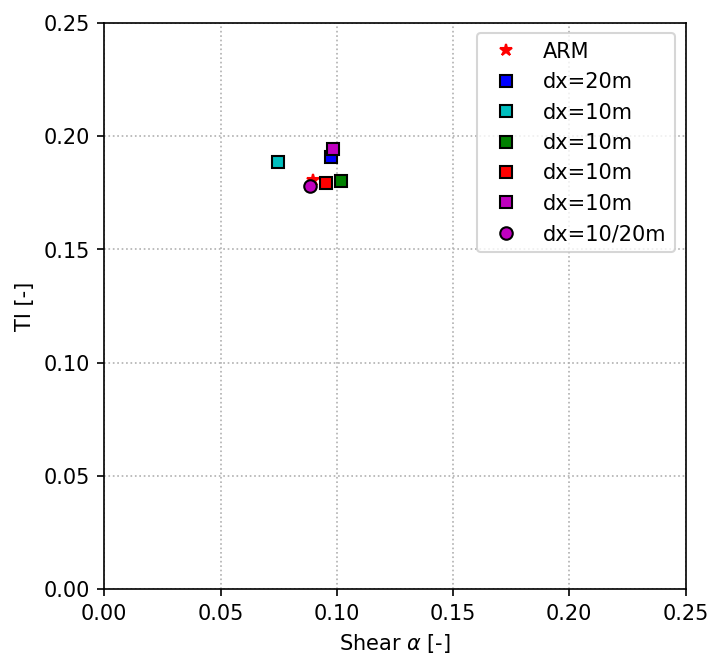

In [7]:
fig, ax = plt.subplots(figsize=(5,5), facecolor='w', dpi=150)

# Plot the ARM data
plt.plot(ARM_alpha, ARM_TI, 'r*', label='ARM')

# Plot the AMR-Wind results
for case in caselist:
    mstyle=case['mstyle']
    #plt.plot(case['reportstats']['Alpha'][3], case['reportstats']['TI_horiz'][2], label=case['tag'], **mstyle)
    #plt.plot(case['alpha_30_169'], case['reportstats']['TI_horiz'][2], label=case['tag'], **mstyle)
    plt.plot(case['alpha_60_91'], case['reportstats']['TI_horiz'][2], label=case['tag'], **mstyle)

plt.xlim([0, 0.25])
plt.ylim([0, 0.25])
plt.xlabel(r'Shear $\alpha$ [-]')
plt.ylabel('TI [-]')
plt.grid(ls=':')
plt.legend()

## Plot velocity profile

Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v


Text(0.5,1,'Horizontal wind speed')

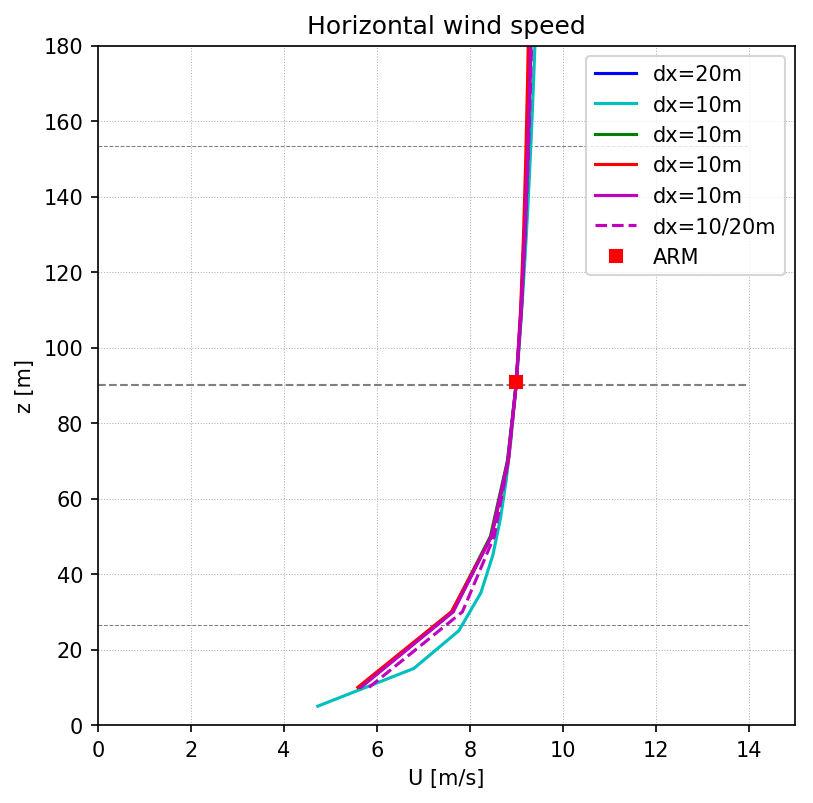

In [8]:
# Plot velocity
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)


# This command returns the data, and then you can plot it individually
for case in caselist:
    amrdat = case['App'].ABLpostpro_plotprofiles(plotvars=['Uhoriz'], avgt=avgtimes)
    lstyle=case['lstyle']
    plt.plot(amrdat['Uhoriz']['data'], amrdat['Uhoriz']['z'], label=case['tag'], **lstyle)

# Plot the turbine dimensions
plt.hlines(90,          0,     14, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line
plt.hlines(90+127*0.5,  0,     14, linestyles='dashed', color='gray', linewidth=0.5) # Plot the HH line
plt.hlines(90-127*0.5,  0,     14, linestyles='dashed', color='gray', linewidth=0.5) # Plot the HH line

#plt.hlines(plotheights[0], 0,              14, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line

ax.plot(ARM_WS, ARM_zHH, 's', color='r', label='ARM')
ax.legend()
ax.set_xlim([0, 15])
ax.set_xlabel('U [m/s]')
ax.grid(linestyle=':', linewidth=0.5)
ax.set_ylim([0,180])
ax.set_ylabel('z [m]')
ax.set_title('Horizontal wind speed')

# Compare AMR-Wind temperature profiles

Loading theta
Loading theta
Loading theta
Loading theta
Loading theta
Loading theta


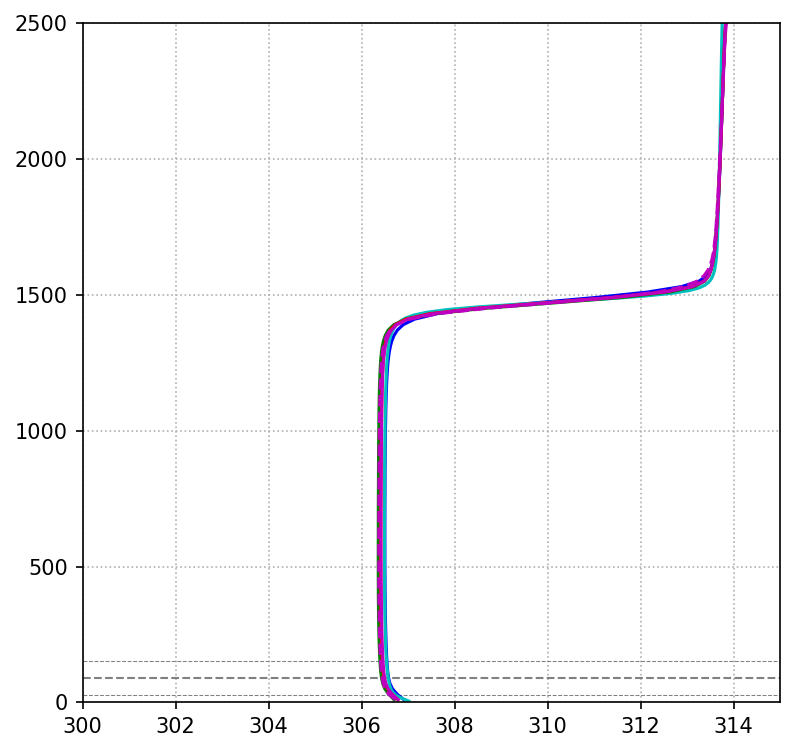

In [9]:
# Plot temperature
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
for case in caselist:
    amrdat = case['App'].ABLpostpro_plotprofiles(plotvars=['Temperature'], avgt=avgtimes)
    lstyle=case['lstyle']
    plt.plot(amrdat['T']['data'], amrdat['T']['z'], label=case['tag'], **lstyle)

# Plot the turbine dimensions
plt.hlines(90,          300,     315, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line
plt.hlines(90+127*0.5,  300,     315, linestyles='dashed', color='gray', linewidth=0.5) # Plot the HH line
plt.hlines(90-127*0.5,  300,     315, linestyles='dashed', color='gray', linewidth=0.5) # Plot the HH line
plt.ylim([0, 2500])
plt.xlim([300, 315])
plt.grid(ls=':')

# Compare AMR-Wind veer profiles

Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v
Loading u
Loading v


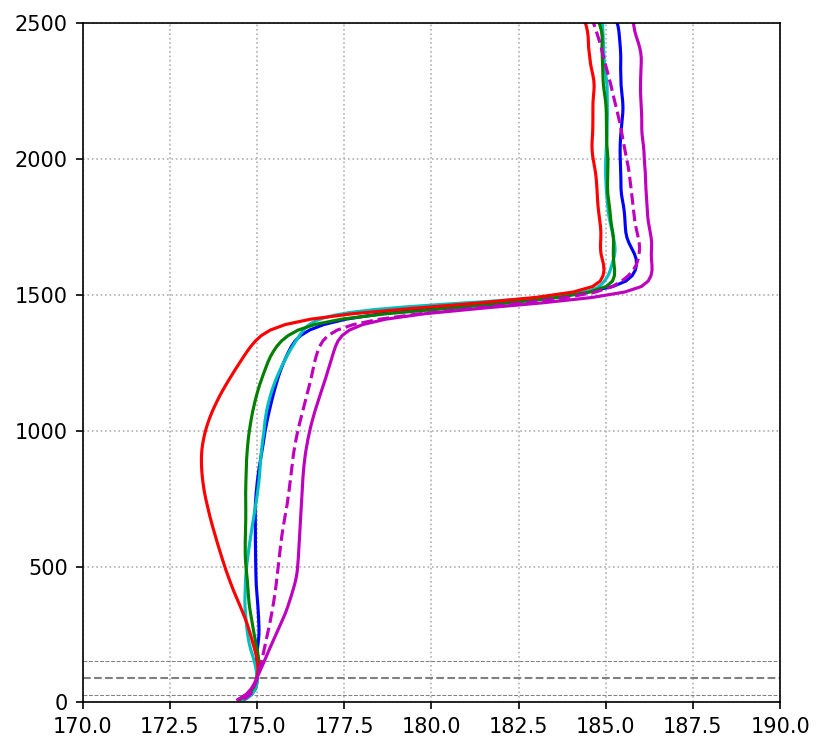

In [10]:
# Plot veer
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=150)

# This command returns the data, and then you can plot it individually
for case in caselist:
    amrdat = case['App'].ABLpostpro_plotprofiles(plotvars=['WindDir'], avgt=avgtimes)
    lstyle=case['lstyle']
    plt.plot(amrdat['WindDir']['data'], amrdat['WindDir']['z'], label=case['tag'], **lstyle)

# Plot the turbine dimensions
plt.hlines(90,          170,     190, linestyles='dashed', color='gray', linewidth=1.0) # Plot the HH line
plt.hlines(90+127*0.5,  170,     190, linestyles='dashed', color='gray', linewidth=0.5) # Plot the HH line
plt.hlines(90-127*0.5,  170,     190, linestyles='dashed', color='gray', linewidth=0.5) # Plot the HH line
plt.ylim([0, 2500])
plt.xlim([170, 190])
plt.grid(ls=':')